In [1]:
!pip install osmnx

In [2]:
!pip install contextily

In [3]:
!pip install unidecode

In [4]:
!pip install joblib

# ANTAD

In [5]:
import pandas as pd
ANTAD = pd.read_csv('/content/drive/MyDrive/Dataton/Dataton final/ANTAD_Miembros.csv', encoding='latin-1')
ANTAD.dropna(axis=1, how='all', inplace=True)

In [6]:
ANTAD

,Nombre Comercial,Razón Social,Clasificación
0,ALSUPER,"OPERADORA FUTURAMA, S.A. DE C.V.",Autoservicio
1,CALIMAX,"CENTRAL DETALLISTA, S.A. DE C.V.",Autoservicio
2,CASA LEY,"CASA LEY, S.A.P.I. DE C.V.",Autoservicio
3,CENTRO COMERCIAL CRUZ AZUL,"CENTRO COMERCIAL CRUZ AZUL, S.A. DE C.V.",Autoservicio
4,CHEDRAUI,"TIENDAS CHEDRAUI, S.A. DE C.V.",Autoservicio
...,...,...,...
87,THE HOME DEPOT,"HOME DEPOT MÉXICO, S. DE R.L. DE C.V.",Especializada
88,THE HOME STORE,"DISTRIBUIDORA STOREHOME, S.A. DE C.V.",Especializada
89,TIENDAS ATLAS,"GRUPO COMERCIAL ATLAS, S.A. DE C.V.",Especializada
90,TODO MODA / ISADORA,"BIJOU MÉXICO, S.A. DE C.V.",Especializada


# DENUE

In [7]:
import os
def read_csv_folder(folder_path):

  all_data = []
  for filename in os.listdir(folder_path):
      if filename.endswith(".csv"):
          filepath = os.path.join(folder_path, filename)
          try:
              df = pd.read_csv(filepath, encoding='latin-1')
              df.dropna(axis=1, how='all', inplace=True)
              all_data.append(df)
          except pd.errors.EmptyDataError:
              print(f"Warning: Skipping empty file {filename}")
          except pd.errors.ParserError:
              print(f"Warning: Skipping file with parsing error {filename}")
          except Exception as e:
              print(f"Error reading {filename}: {e}")

  if all_data:
    return pd.concat(all_data, ignore_index=True)
  else:
      print("No valid CSV files found in the specified folder.")
      return None

folder_path = '/content/drive/MyDrive/Dataton/Dataton final/DENUE'
DENUE = read_csv_folder(folder_path)

<ipython-input-7-2c3d5787f36c>:9: DtypeWarning: Columns (35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='latin-1')
<ipython-input-7-2c3d5787f36c>:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='latin-1')
<ipython-input-7-2c3d5787f36c>:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='latin-1')
<ipython-input-7-2c3d5787f36c>:9: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='latin-1')


In [8]:
len(DENUE)

2261945

In [9]:
for col in DENUE.columns:
  print(col)

id
clee
nom_estab
raz_social
codigo_act
nombre_act
per_ocu
tipo_vial
nom_vial
tipo_v_e_1
nom_v_e_1
tipo_v_e_2
nom_v_e_2
tipo_v_e_3
nom_v_e_3
numero_ext
letra_ext
edificio
edificio_e
numero_int
letra_int
tipo_asent
nomb_asent
tipoCenCom
nom_CenCom
num_local
cod_postal
cve_ent
entidad
cve_mun
municipio
cve_loc
localidad
ageb
manzana
telefono
correoelec
www
tipoUniEco
latitud
longitud
fecha_alta


In [10]:
DENUE['entidad'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas'],
      dtype=object)

In [11]:
CDMX = DENUE[DENUE['entidad'] == 'Ciudad de México']

Sacar los otros muncipios que forman parte de la zona metropolitana de la CDMX

In [12]:
zona_metropolitana_valle_mexico = [
    # Ciudad de México (16 Alcaldías)
    "Álvaro Obregón", "Azcapotzalco", "Benito Juárez", "Coyoacán", "Cuajimalpa de Morelos",
    "Cuauhtémoc", "Gustavo A. Madero", "Iztacalco", "Iztapalapa", "Magdalena Contreras",
    "Miguel Hidalgo", "Milpa Alta", "Tláhuac", "Tlalpan", "Venustiano Carranza", "Xochimilco",

    # Estado de México (59 Municipios)
    "Atizapán de Zaragoza",
    "Chalco", "Chicoloapan", "Chiconcuac", "Chimalhuacán", "Coacalco de Berriozábal",
    "Cuautitlán", "Cuautitlán Izcalli", "Ecatepec de Morelos",
    "Huixquilucan", "Ixtapaluca",
    "La Paz", "Naucalpan de Juárez", "Nicolás Romero",
    "Tecámac", "Tlalnepantla de Baz", "Tultitlán",
    "Valle de Chalco Solidaridad", "Villa del Carbón",

    # Hidalgo (1 Municipio)
    "Tizayuca"
]


In [13]:
# prompt: i want a list of cve_ent and cve_mun that respresnts each municpio in zona_metropolitana_valle_mexico

cve_ent = []
cve_mun = []

for municipio in zona_metropolitana_valle_mexico:
    # Assuming your DENUE dataframe has columns 'municipio' and relevant CVE codes
    subset = DENUE[DENUE['municipio'] == municipio]
    if not subset.empty:
      # Extract CVE codes, handling potential multiple entries
      cve_ent.extend(subset['cve_ent'].unique())
      cve_mun.extend(subset['cve_mun'].unique())
    else:
      print(f"Municipio '{municipio}' not found in DENUE data.")

# Create a list of tuples
cve_data = list(zip(cve_ent, cve_mun))

# Print or use the cve_data as needed
cve_data

Municipio 'Magdalena Contreras' not found in DENUE data.


[(9, 10),
 (16, 3),
 (9, 2),
 (9, 14),
 (12, 5),
 (23, 71),
 (26, 45),
 (29, 27),
 (30, 4),
 (32, 3),
 (9, 4),
 (9, 5),
 (6, 17),
 (8, 15),
 (9, 8),
 (32, 5),
 (9, 6),
 (9, 7),
 (9, 16),
 (9, 9),
 (9, 11),
 (9, 12),
 (9, 106),
 (7, 17),
 (9, 103),
 (16, 194),
 (21, 13),
 (9, 13),
 (15, 25),
 (15, 29),
 (15, 30),
 (15, 31),
 (15, 20),
 (15, 24),
 (15, 121),
 (15, 33),
 (15, 37),
 (15, 39),
 (15, 3),
 (3, 70),
 (15, 57),
 (15, 60),
 (15, 81),
 (15, 104),
 (15, 109),
 (15, 122),
 (15, 112),
 (15, 69)]

In [14]:
# prompt: only get ent mun combinations that have ent as 15 or 9 but retain all the diferent mun only found in the dict cve_data

# Assuming cve_data is defined as in the previous code

filtered_cve_data = []
mun_values = set()

for ent, mun in cve_data:
    if ent == 15 or ent == 9:
        filtered_cve_data.append((ent, mun))
        mun_values.add(mun)

filtered_cve_data = list(set(filtered_cve_data)) #Remove duplicates

filtered_cve_data

[(9, 103),
 (15, 30),
 (15, 24),
 (9, 106),
 (15, 33),
 (15, 39),
 (9, 2),
 (9, 5),
 (9, 8),
 (9, 14),
 (15, 109),
 (9, 11),
 (15, 112),
 (15, 57),
 (15, 121),
 (15, 60),
 (15, 69),
 (15, 81),
 (15, 20),
 (15, 29),
 (9, 7),
 (9, 4),
 (9, 10),
 (9, 16),
 (9, 13),
 (15, 25),
 (15, 31),
 (15, 37),
 (15, 104),
 (9, 9),
 (9, 6),
 (9, 12),
 (15, 122),
 (15, 3)]

In [15]:
from collections import Counter

# Count occurrences of each entity (ent) in filtered_cve_data
entity_counts = Counter(ent for ent, mun in filtered_cve_data)

entity_counts

Counter({9: 15, 15: 19})

In [16]:
edo_mex = DENUE[DENUE['entidad'] == 'México']
municipios_cdmx = CDMX['municipio'].unique()
municipios_edomex = edo_mex['municipio'].unique()

print("Municipios de la Ciudad de México:")
for municipio in municipios_cdmx:
    print(municipio)

print("\nMunicipios del Estado de México:")
for municipio in municipios_edomex:
  print(municipio)

Municipios de la Ciudad de México:
Azcapotzalco
Álvaro Obregón
Gustavo A. Madero
Miguel Hidalgo
Coyoacán
Venustiano Carranza
La Magdalena Contreras
Cuauhtémoc
Cuajimalpa de Morelos
Iztapalapa
Xochimilco
Tláhuac
Benito Juárez
Iztacalco
Tlalpan
Milpa Alta

Municipios del Estado de México:
Tenancingo
Toluca
Chimalhuacán
Tequixquiac
Ecatepec de Morelos
Tezoyuca
Atizapán de Zaragoza
Texcoco
La Paz
Temascalapa
Valle de Chalco Solidaridad
Atizapán
Nezahualcóyotl
Acolman
Tultitlán
Ixtapaluca
Coacalco de Berriozábal
San Mateo Atenco
Cuautitlán
Zumpango
Naucalpan de Juárez
Tlalnepantla de Baz
Atlautla
Chalco
Acambay de Ruíz Castañeda
Huixquilucan
Tecámac
Tenango del Valle
Melchor Ocampo
Amecameca
El Oro
Valle de Bravo
Cuautitlán Izcalli
Villa Victoria
Atlacomulco
Juchitepec
Nextlalpan
Tejupilco
Tianguistenco
Tepotzotlán
Ocoyoacac
Temamatla
Ozumba
Otzolotepec
Isidro Fabela
Otzoloapan
Almoloya de Alquisiras
Tlalmanalco
Zacualpan
Coatepec Harinas
Chicoloapan
Hueypoxtla
Temoaya
Jiquipilco
Metepec
Co

In [17]:
CDMX = DENUE[DENUE['municipio'].isin(zona_metropolitana_valle_mexico)]

In [18]:
CDMX.dropna(subset=['raz_social'], inplace=True)

<ipython-input-18-895b87cf828c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CDMX.dropna(subset=['raz_social'], inplace=True)


In [19]:
CDMX

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
16136,7816160,03003461110016751000000000U0,ABARROTES JADE,ABARROTES JADE,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,ABEDUL,CALLE,...,La Paz ...,6503,15,NaN,NaN,NaN,Semifijo,24.024380,-110.306929,2019-11
16221,9469478,03003461110018381000000000U4,ABARROTES LA MIXTECA,JORNALEROS OAXAQUEÑOS EN B. C. S. SA DE CV,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,OTRO(ESPECIFIQUE),...,General Juan Domínguez Cota ...,2591,33,NaN,NaN,NaN,Fijo,23.970487,-109.957105,2023-11
16253,8766024,03003461110016261000000000U0,ABARROTES LAS PRADERAS,ABARROTES LAS PRADERAS,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,CALLE,...,La Paz ...,6645,19,6121048269.0,NaN,NaN,Fijo,24.091041,-110.341455,2019-11
16709,8160356,03003461110018011000000000S7,ALMACEN FORD SERVICE,CS FOOD SERVICE S DE RL DE CV,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,BOULEVARD,...,La Paz ...,3354,27,NaN,NaN,NaN,Fijo,24.129185,-110.331942,2019-11
16724,9307188,03003461110018131000000000U3,BODEGA EL DIABLO,BODEGA EL DIABLO,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,CIENCIAS DEL MAR,CALLE,...,La Paz ...,3161,53,NaN,NaN,NaN,Fijo,24.104268,-110.307029,2020-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257159,6781776,32008462112000041001008202S3,COMERCIO AL POR MENOR EN MINISÚPER,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,NaN,Morelos - Cosio,NaN,...,San Pedro Piedra Gorda ...,0386,2,NaN,NaN,NaN,Fijo,22.460726,-102.346362,2024-05
2257721,4641573,32008461160000051000000000U2,DULCERÍA EL CARAMELO,DULCERÍA EL CARAMELO,461160,Comercio al por menor de dulces y materias pri...,0 a 5 personas,CALLE,VICENTE GUERRERO,AVENIDA,...,San Pedro Piedra Gorda ...,0193,20,4581054500.0,NaN,NaN,Fijo,22.450871,-102.346658,2014-12
2259985,6851184,32008462112000052000008202S0,OXXO SUC 50FPG CAPUFE A ZCL,CADENA COMERCIAL OXXO SA DE CV,462112,Comercio al por menor en minisupers,6 a 10 personas,CARRETERA,NINGUNO,CALLE,...,San Pedro Piedra Gorda ...,0386,2,NaN,ATENCIONCLIENTES@OXXO.COM,WWW.OXXO.COM,Fijo,22.460713,-102.346355,2018-11
2260354,4641567,32008461190000021000046200S2,PASTELERIA MELANY,PANADERIA Y PASTELERIA VAZQUEZ HERMANOS SA DE CV,461190,Comercio al por menor de otros alimentos,0 a 5 personas,CALLE,VICENTE GUERRERO,CALLE,...,San Pedro Piedra Gorda ...,0193,17,NaN,NaN,NaN,Fijo,22.450686,-102.347753,2014-12


#SHP MANZANAS

In [20]:
import geopandas as gpd
shapefile_path = '/content/drive/MyDrive/Dataton/Dataton final/Mapa/Manzana/2020_1_09_FM.shp'

try:
    manzanas = gpd.read_file(shapefile_path)
except FileNotFoundError:
    print(f"Error: Shapefile not found at {shapefile_path}")
except Exception as e:
    print(f"An error occurred: {e}")

In [21]:
manzanas

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,CVEVIAL,CVESEG,CVEFT,NOMVIAL,...,CVESEG2,CVEREF2,TIPOVR2,NOMREF2,CVEVIAL3,CVESEG3,CVEREF3,TIPOVR3,NOMREF3,geometry
0,0901000011133023,09,010,0001,1133,023,02856,00005,1,Pimentel,...,00001,2,Calle,Privada Pimentel,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.18801 19.34335, -99.18795 19.3..."
1,0901200261528030,09,012,0026,1528,030,00215,00002,1,Ninguno,...,00005,2,Calle,Ninguno,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.20002 19.21227, -99.20014 19.2..."
2,0901200261528030,09,012,0026,1528,030,00147,00005,3,Mariano Escobedo,...,00002,1,Calle,Ninguno,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.20187 19.21289, -99.20174 19.2..."
3,0901200261528048,09,012,0026,1528,048,00017,00002,1,Tercera Cerrada de Francisco Peñuñuri,...,00002,2,Calle,Tercera Francisco Peñuñuri,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.19714 19.21697, -99.19715 19.2..."
4,0901200261528048,09,012,0026,1528,048,00017,00002,3,Tercera Cerrada de Francisco Peñuñuri,...,00002,2,Calle,Tercera Francisco Peñuñuri,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.19736 19.21755, -99.19740 19.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376253,0901200012013012,09,012,0001,2013,012,03758,00001,18,Privada de Palma,...,00001,12,Cerrada,Cerrada de Palma,01198,00024,5,Calle,Benito Juárez,"LINESTRING (-99.16984 19.25179, -99.16984 19.2..."
376254,0901200012013012,09,012,0001,2013,012,03759,00001,21,José María Morelos,...,00017,19,Calle,Palma,01198,00034,1,Calle,Benito Juárez,"LINESTRING (-99.17078 19.25220, -99.17078 19.2..."
376255,0901200012013012,09,012,0001,2013,012,03759,00001,23,José María Morelos,...,00017,19,Calle,Palma,01198,00034,1,Calle,Benito Juárez,"LINESTRING (-99.17035 19.25204, -99.17077 19.2..."
376256,0901200012013012,09,012,0001,2013,012,03758,00001,15,Privada de Palma,...,00001,12,Cerrada,Cerrada de Palma,01198,00034,1,Calle,Benito Juárez,"LINESTRING (-99.16980 19.25181, -99.16981 19.2..."


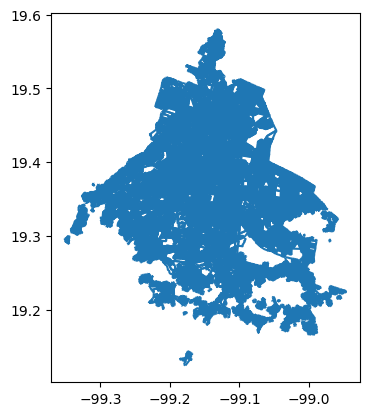

In [22]:
import matplotlib.pyplot as plt

try:
  manzanas.plot()
  plt.show()
except NameError:
  print("gdf is not defined. Please ensure the shapefile is loaded correctly.")
except Exception as e:
  print(f"An error occurred during plotting: {e}")

# Spatial Analysis

## Base Data

In [23]:
CDMX.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
16136,7816160,03003461110016751000000000U0,ABARROTES JADE,ABARROTES JADE,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,ABEDUL,CALLE,...,La Paz ...,6503,15,NaN,NaN,NaN,Semifijo,24.024380,-110.306929,2019-11
16221,9469478,03003461110018381000000000U4,ABARROTES LA MIXTECA,JORNALEROS OAXAQUEÑOS EN B. C. S. SA DE CV,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,OTRO(ESPECIFIQUE),...,General Juan Domínguez Cota ...,2591,33,NaN,NaN,NaN,Fijo,23.970487,-109.957105,2023-11
16253,8766024,03003461110016261000000000U0,ABARROTES LAS PRADERAS,ABARROTES LAS PRADERAS,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,CALLE,...,La Paz ...,6645,19,6121048269.0,NaN,NaN,Fijo,24.091041,-110.341455,2019-11
16709,8160356,03003461110018011000000000S7,ALMACEN FORD SERVICE,CS FOOD SERVICE S DE RL DE CV,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,NINGUNO,BOULEVARD,...,La Paz ...,3354,27,NaN,NaN,NaN,Fijo,24.129185,-110.331942,2019-11
16724,9307188,03003461110018131000000000U3,BODEGA EL DIABLO,BODEGA EL DIABLO,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,CIENCIAS DEL MAR,CALLE,...,La Paz ...,3161,53,NaN,NaN,NaN,Fijo,24.104268,-110.307029,2020-11


In [24]:
manzanas.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,CVEVIAL,CVESEG,CVEFT,NOMVIAL,...,CVESEG2,CVEREF2,TIPOVR2,NOMREF2,CVEVIAL3,CVESEG3,CVEREF3,TIPOVR3,NOMREF3,geometry
0,0901000011133023,09,010,0001,1133,023,02856,00005,1,Pimentel,...,00001,2,Calle,Privada Pimentel,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.18801 19.34335, -99.18795 19.3..."
1,0901200261528030,09,012,0026,1528,030,00215,00002,1,Ninguno,...,00005,2,Calle,Ninguno,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.20002 19.21227, -99.20014 19.2..."
2,0901200261528030,09,012,0026,1528,030,00147,00005,3,Mariano Escobedo,...,00002,1,Calle,Ninguno,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.20187 19.21289, -99.20174 19.2..."
3,0901200261528048,09,012,0026,1528,048,00017,00002,1,Tercera Cerrada de Francisco Peñuñuri,...,00002,2,Calle,Tercera Francisco Peñuñuri,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.19714 19.21697, -99.19715 19.2..."
4,0901200261528048,09,012,0026,1528,048,00017,00002,3,Tercera Cerrada de Francisco Peñuñuri,...,00002,2,Calle,Tercera Francisco Peñuñuri,N/A,N/A,0,N/A,N/A,"LINESTRING (-99.19736 19.21755, -99.19740 19.2..."


In [25]:
import pandas as pd
import geopandas as gpd


# Convert businesses DataFrame to GeoDataFrame
businesses_gdf = gpd.GeoDataFrame(CDMX, geometry=gpd.points_from_xy(CDMX.longitud, CDMX.latitud))

# Ensure both are in the same CRS
businesses_gdf = businesses_gdf.set_crs('EPSG:4326')  # Assuming WGS84
manzanas = manzanas.to_crs('EPSG:4326')

In [26]:
businesses_gdf = businesses_gdf[businesses_gdf['longitud'] >= -99.4]
businesses_gdf = businesses_gdf[businesses_gdf['longitud'] <= -98]
businesses_gdf = businesses_gdf[businesses_gdf['latitud'] <= 20]


In [27]:
import string

def remove_punctuation(text):
  if isinstance(text, str):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator).lower()
  else:
    return text

ANTAD['Nombre Comercial'] = ANTAD['Nombre Comercial'].apply(remove_punctuation)
DENUE['nom_estab'] = DENUE['nom_estab'].apply(remove_punctuation)

businesses_gdf['raz_social'] = businesses_gdf['raz_social'].apply(remove_punctuation)
businesses_gdf['nom_estab'] = businesses_gdf['nom_estab'].apply(remove_punctuation)

In [28]:
ANTAD['Nombre Comercial'].unique()

array(['alsuper', 'calimax', 'casa ley', 'centro comercial cruz azul',
       'chedraui', 'fenix', 'heb', 'la comer', 'la mision',
       'más bodega y logística', 'merza', 'piticó', 'smart',
       'smart  final', 'soriana', 'su bodega', 'su plaza',
       'súper del norte', 'súper gutiérrez', 'súper kompras',
       'súper san francisco de asís', 'súper willys',
       'supermercados aramburo', 'waldos dolar mart',
       'zorro supermercado mayorista', 'almacenes garcía', 'cimaco',
       'coppel', 'del sol y woolworth', 'el nuevo mundo',
       'el palacio de hierro', 'hemsa', 'la marina', 'liverpool',
       'sanborns', 'sears', 'tiendas chapur', 'suburbia', '7 eleven',
       'almacenes anfora', 'american eagle outfitters', 'anforama',
       'autozone', 'bizzarro', 'c  a', 'carters', 'comex',
       'cuauhtémoc moctezuma retail', 'dorothy gaynor', 'extra',
       'farmacia guadalajara', 'farmacias benavides',
       'farmacias del ahorro', 'farmacias klyn´s', 'flexi', 'grupo axo

In [29]:
businesses_gdf['nom_estab']

,nom_estab
87017,abarrotera gaviota
87048,abarrotes
87053,abarrotes
87080,abarrotes
87100,abarrotes
...,...
2003446,zara home
2003448,zara home
2003450,zaragoza 834
2199482,liconsa


In [30]:
suburbia_rows = businesses_gdf[businesses_gdf['nom_estab'].str.lower().str.contains("suburbia")]
suburbia_rows.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
676384,9229694,09012463211012062000021645S5,674 suburbia santa ursula,suburbia s de rl de cv,463211,"Comercio al por menor de ropa, excepto de bebé...",51 a 100 personas,AVENIDA,INSURGENTES SUR,CALLE,...,0939,2,NaN,CONTACTO@SUBURBIA.COM.MX,WWW.SUBURBIA.COM.MX,Fijo,19.283959,-99.175735,2020-04,POINT (-99.17573 19.28396)
1761622,6313438,09003462210000021001021645S7,491 suburbia taxquena,suburbia s de rl de cv,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,AVENIDA,MIGUEL ÁNGEL DE QUEVEDO,AVENIDA,...,0234,2,NaN,CONTACTO@SUBURBIA.COM.MX,WWW.SUBURBIA.COM.MX,Fijo,19.347121,-99.181351,2010-07,POINT (-99.18135 19.34712)
1761623,6304513,09015462210000031001021645S0,493 suburbia buenavista,suburbia s de rl de cv,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,AVENIDA,INSURGENTES NORTE,OTRO(ESPECIFIQUE),...,049A,7,NaN,CONTACTO@SUBURBIA.COM.MX,WWW.SUBURBIA.COM.MX,Fijo,19.445522,-99.153303,2010-07,POINT (-99.15330 19.44552)
1761624,6312958,09014462210000031000021645S3,494 suburbia holbein,suburbia s de rl de cv,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,AVENIDA,INSURGENTES SUR,EJE VIAL,...,0577,30,NaN,CONTACTO@SUBURBIA.COM.MX,WWW.SUBURBIA.COM.MX,Fijo,19.382938,-99.176138,2010-07,POINT (-99.17614 19.38294)
1761625,6309078,09016462210000361002021645S9,495 suburbia toreo,suburbia s de rl de cv,462210,Comercio al por menor en tiendas departamentales,51 a 100 personas,PERIFERICO,BOULEVARD MANUEL ÁVILA CAMACHO,CALLE,...,0302,1,NaN,CONTACTO@SUBURBIA.COM.MX,WWW.SUBURBIA.COM.MX,Fijo,19.450118,-99.219855,2010-07,POINT (-99.21985 19.45012)


In [31]:
from unidecode import unidecode

In [32]:
ANTAD['Nombre Comercial'] = ANTAD['Nombre Comercial'].astype(str).apply(unidecode)
businesses_gdf['nom_estab'] = businesses_gdf['nom_estab'].astype(str).apply(unidecode)

ANTAD['Razón Social'] = ANTAD['Razón Social'].astype(str).apply(unidecode)
businesses_gdf['raz_social'] = businesses_gdf['raz_social'].astype(str).apply(unidecode)

ANTAD['Nombre Comercial'] = ANTAD['Nombre Comercial'].str.lower()
ANTAD['Razón Social'] = ANTAD['Razón Social'].str.lower()

In [33]:
ANTAD_gdf = gpd.GeoDataFrame()

for index, row in businesses_gdf.iterrows():
  nom_estab = row['nom_estab']
  raz_social = row['raz_social']

  for _, antad_row in ANTAD.iterrows():
    nombre_comercial = antad_row['Nombre Comercial']
    razon_social = antad_row['Razón Social']

    if isinstance(nom_estab, str) and isinstance(nombre_comercial, str) and (nombre_comercial in nom_estab or razon_social in raz_social):
      ANTAD_gdf = pd.concat([ANTAD_gdf, pd.DataFrame([row])], ignore_index=True)
      break # Exit inner loop if a match is found

# Ensure ANTAD_gdf is a GeoDataFrame
if not ANTAD_gdf.empty:
    ANTAD_gdf = gpd.GeoDataFrame(ANTAD_gdf, geometry='geometry', crs=businesses_gdf.crs)

In [34]:
suburbia_rows = ANTAD_gdf[ANTAD_gdf['nom_estab'].str.lower().str.contains("suburbia")]

## Draw Buisness per activity

In [35]:
import contextily as ctx

In [36]:
ANTAD_gdf['codigo_act'].unique()

array([461110, 463211, 464121, 464122, 465112, 465211, 463212, 463310,
       465215, 464112, 464111, 463216, 465212, 465311, 465312, 464113,
       465111, 467113, 466112, 467112, 468211, 465911, 466114, 467114,
       467115, 468111, 466212, 468213, 466211, 466111, 468311, 466319,
       465919, 468411, 467111, 465912, 468420, 468112, 469110, 465913,
       468412, 466312, 462111, 461190, 463111, 462210, 462112, 461211,
       461212, 461150, 461170, 461160, 461123, 461213, 463112, 461130])

In [37]:
from shapely.geometry import Point

In [38]:
counts_per_codigo = ANTAD_gdf['codigo_act'].value_counts()
counts_per_codigo

,count
codigo_act,
462112,577
467113,407
464111,245
462210,233
464121,219
462111,197
466212,193
463211,158
464112,115


In [39]:
ANTAD_gdf['act'] = ANTAD_gdf['codigo_act'].astype(str).str[:-2]

In [40]:
counts_per_act = ANTAD_gdf['act'].value_counts()
counts_per_act

,count
act,
4621,774
4641,629
4671,431
4622,233
4662,205
4632,204
4612,93
4653,79
4652,78


In [41]:
businesses_gdf['act'] = businesses_gdf['codigo_act'].astype(str).str[:-2]

In [42]:
DENUE_gdf = businesses_gdf[businesses_gdf['act'].isin(ANTAD_gdf['act'].unique())]

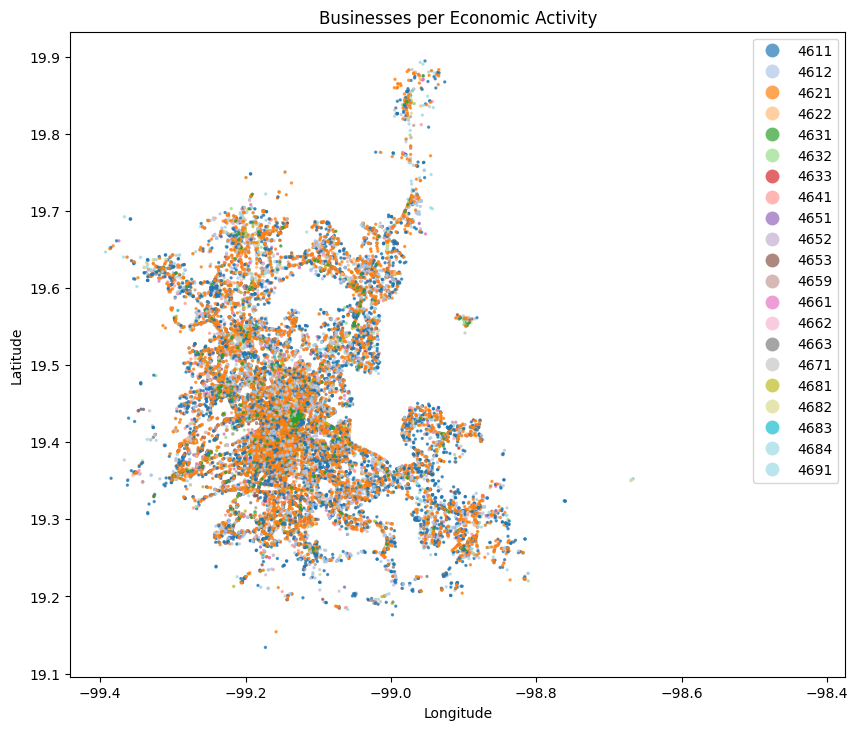

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot base map if you have one, e.g., country or city boundaries

DENUE_gdf.plot(column='act',
         ax=ax,
         legend=True,
         cmap='tab20',  # Choose a colormap that can handle many categories
         markersize=2,
         alpha=0.7)

# Customize the plot
plt.title('Businesses per Economic Activity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [44]:
counts_per_act_denue = DENUE_gdf['act'].value_counts()
counts_per_act_denue

,count
act,
4611,5424
4621,5283
4641,4560
4632,3905
4671,2720
4661,1722
4662,1604
4612,1489
4651,1422


4682 - Coches - 1395

4662 - Compus - 1604

4621	- Auto - 5283

4622 - Depa - 482

4653 - Papeleria - 958

Get names of negocios for each economic activity

In [45]:
selected_activity = '4622'

filtered_df = DENUE_gdf[DENUE_gdf['act'] == selected_activity]

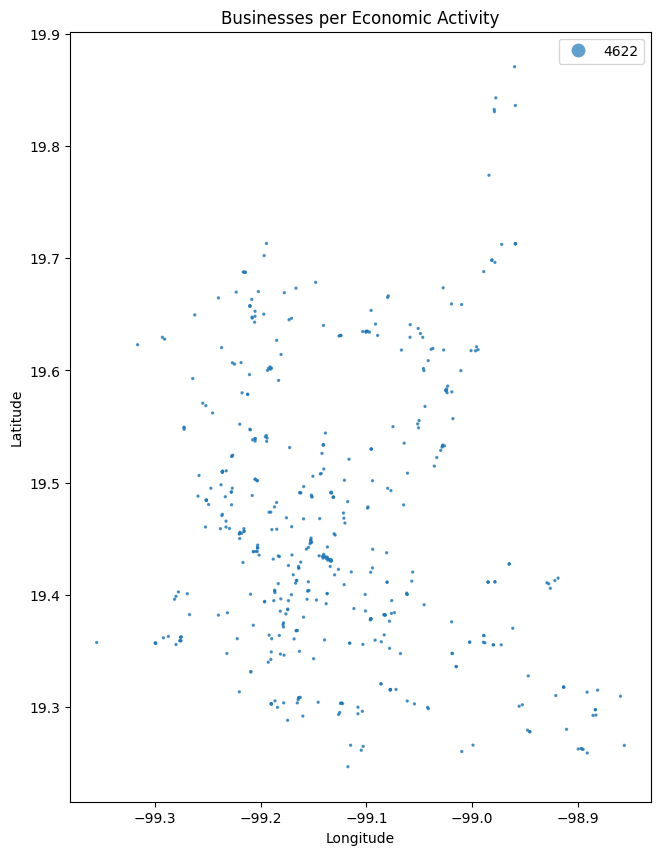

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot base map if you have one, e.g., country or city boundaries

filtered_df.plot(column='act',
         ax=ax,
         legend=True,
         cmap='tab20',  # Choose a colormap that can handle many categories
         markersize=2,
         alpha=0.7)

# Customize the plot
plt.title('Businesses per Economic Activity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

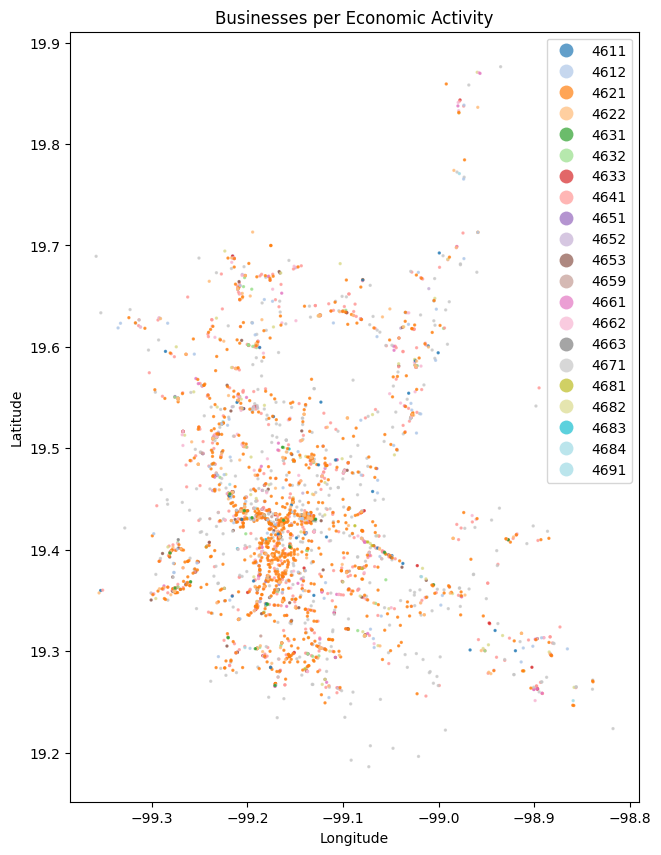

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))

# Plot base map if you have one, e.g., country or city boundaries

ANTAD_gdf.plot(column='act',
         ax=ax,
         legend=True,
         cmap='tab20',  # Choose a colormap that can handle many categories
         markersize=2,
         alpha=0.7)

# Customize the plot
plt.title('Businesses per Economic Activity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## OSM Map Data

In [48]:
import osmnx as ox

place = 'Mexico City, Mexico'

G_walk = ox.graph_from_place(place, network_type='walk')

G_drive = ox.graph_from_place(place, network_type='drive')

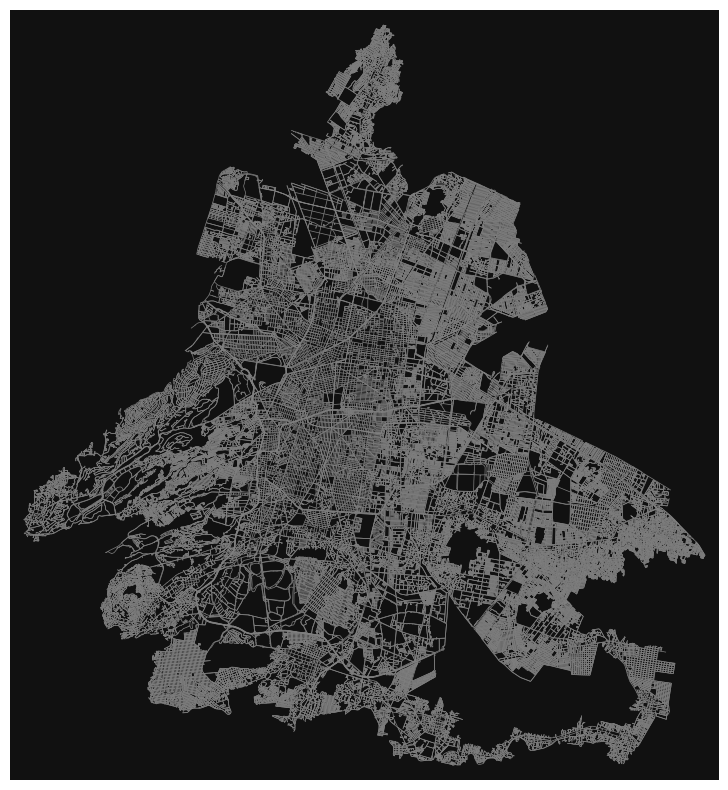

In [49]:
fig, ax = ox.plot_graph(G_drive, figsize=(10, 10), node_size=0, edge_linewidth=0.5, edge_color="gray")
# Display the map.

plt.show()

ANTAD_gdf CRS: EPSG:4326
G_drive CRS: epsg:4326


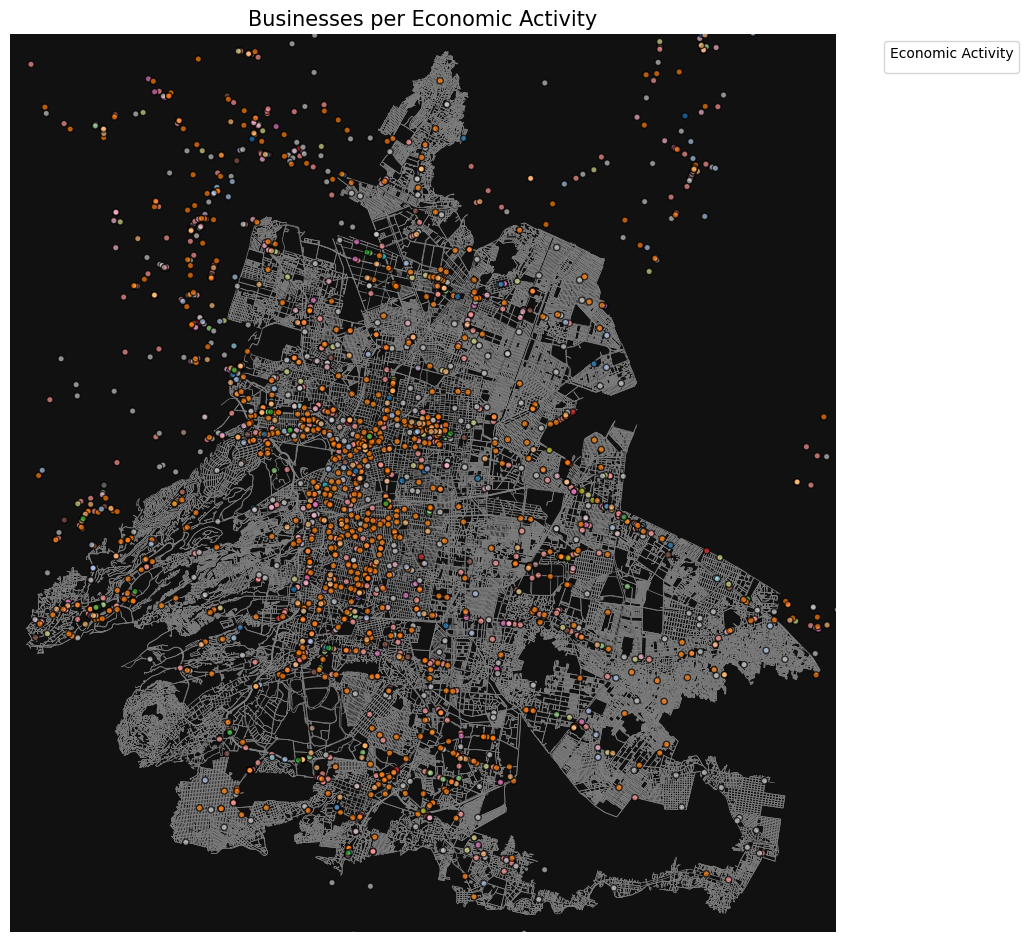

In [134]:
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd

print(f"ANTAD_gdf CRS: {ANTAD_gdf.crs}")
print(f"G_drive CRS: {ox.graph_to_gdfs(G_drive, nodes=False, edges=True).crs}")


if ANTAD_gdf.crs != "EPSG:4326":
    ANTAD_gdf = ANTAD_gdf.to_crs(epsg=4326)

fig, ax = ox.plot_graph(
    G_drive,
    figsize=(10, 10),
    node_size=0,
    edge_linewidth=0.5,
    edge_color="gray",
    show=False,
    close=False
)

ANTAD_gdf.plot(
    column='act',
    ax=ax,
    legend=True,
    cmap='tab20',  # Suitable for categorical data with many classes
    markersize=20,  # Adjust size as needed
    alpha=0.7,
    edgecolor='k'  # Optional: add edge color for better visibility
)

plt.title('Businesses per Economic Activity', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Economic Activity', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping

plt.show()


## Isochrone creation

35 min 30 s
Average travel time to drive 10 km
https://www.tomtom.com/traffic-index/mexico-city-traffic/

In [50]:
def add_edge_speeds(G, mode='walk'):
    if mode == 'walk':
        speed = 3

    elif mode == 'drive':
        speed = 14

    for u, v, data in G.edges(data=True):
        length = data.get('length', 0)
        speed_m_s = speed * 1000 / 3600
        data['travel_time'] = length / speed_m_s
    return G

G_walk = add_edge_speeds(G_walk, mode='walk')
G_drive = add_edge_speeds(G_drive, mode='drive')

In [51]:
import networkx as nx
from shapely.geometry import Polygon, MultiPolygon
from shapely.ops import cascaded_union
from shapely.geometry import Point, MultiPoint

def isochrone_polygons(G, center_node, trip_time):
    subgraph = nx.ego_graph(G, center_node, radius=trip_time, distance='travel_time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    if node_points:
        polygon = MultiPoint(node_points).convex_hull
        return polygon
    else:
        return None

4682 - Coches - 1395

4662 - Compus - 1604

4621	- Auto - 5283

4622 - Depa - 482



In [52]:
ANTAD_gdf

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry,act
0,868192,09015461110007171000000000U0,abarrotes casa martinez,abarrotes casa martinez,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,JUAN LUCAS DE LASSAGA,CALLE,...,5,NaN,NaN,NaN,Fijo,19.416825,-99.138333,2010-07,POINT (-99.13833 19.41682),4611
1,7733003,09015461110032791000000000U4,abarrotes chavo fenix,abarrotes chavo fenix,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,MANUEL GUTIERREZ NAJERA,CALLE,...,5,NaN,NaN,NaN,Fijo,19.415501,-99.139479,2019-11,POINT (-99.13948 19.41550),4611
2,907714,09003461110027591000000000U1,abarrotes el fenix,abarrotes el fenix,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,EJE VIAL,1 ORIENTE (AVENIDA VIA LACTEA),CALLE,...,5,NaN,NaN,NaN,Fijo,19.355022,-99.130527,2014-12,POINT (-99.13053 19.35502),4611
3,703862,09017461110031731000000000U7,abarrotes el fenix,abarrotes el fenix,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,BACUM,CALLE,...,8,NaN,NaN,NaN,Fijo,19.412609,-99.117290,2014-12,POINT (-99.11729 19.41261),4611
4,7832532,09007461110156361000000000U3,abarrotes martinez,abarrotes martinez,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,CALLE,PABLO GARCIA,CALLE,...,26,NaN,5578855501F@GMAIL.COM.MX,NaN,Fijo,19.394208,-99.048834,2019-11,POINT (-99.04883 19.39421),4611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3087,2305155,15033461212001341000000000U4,venta de cerveza modelorama,la cerveza modelo del centro sa de cv,461212,Comercio al por menor de cerveza,0 a 5 personas,BOULEVARD,TEOCALLIS,CALLE,...,8,NaN,NaN,NaN,Fijo,19.544313,-99.028937,2014-12,POINT (-99.02894 19.54431),4612
3088,7659612,15122461130006591000000000U4,verduleria martina,asociacion unidos por un pedazo de tierra,461130,Comercio al por menor de frutas y verduras fre...,0 a 5 personas,CALLE,BRECHA F,NaN,...,35,NaN,NaN,NaN,Fijo,19.301226,-98.967084,2019-11,POINT (-98.96708 19.30123),4611
3089,6350044,15037463112000031002002503S3,zara home,zara home mexico sa de cv,463112,Comercio al por menor de blancos,11 a 30 personas,CALLE,VIALIDAD DE LA BARRANCA,CALLE,...,3,NaN,CESARIDM@MX.INDITEX.MX,WWW.ZARAHOME.COM.MX,Fijo,19.396850,-99.280993,2014-12,POINT (-99.28099 19.39685),4631
3090,6350047,15057463112000242001002503S4,zara home,zara home mexico sa de cv,463112,Comercio al por menor de blancos,11 a 30 personas,AVENIDA,RÍO S. JOAQUÍN,AVENIDA,...,4,NaN,CESARIDM@MX.INDITEX.COM,WWW.ZARAHOME.COM.MX,Fijo,19.455069,-99.218353,2010-07,POINT (-99.21835 19.45507),4631


In [136]:
ANTAD_sel_gdf = ANTAD_gdf[ANTAD_gdf['act'].isin(['4682', '4662','4622','4621'])]
ANTAD_sel_gdf_walk = ANTAD_gdf[ANTAD_gdf['act'].isin(['4621','4622'])]

In [ ]:
import multiprocessing as mp
from functools import partial
from shapely.geometry import Point
import osmnx as ox

from joblib import Parallel, delayed
from tqdm import tqdm


def generater_isochrone(cluster_row, G, mode, time_limits):
    idx, row = cluster_row
    point = row.geometry
    center_node = ox.nearest_nodes(G, point.x, point.y)
    isochrones = []
    for time_limit in time_limits:
        polygon = isochrone_polygons(G, center_node, time_limit * 60)
        if polygon:
            isochrones.append({
                'act': row['act'],
                'geometry': polygon,
                'mode': mode,
                'time_limit': time_limit
            })
    return isochrones

def parallel_cluster_isochrones_joblib(cluster_gdf, G, mode, time_limits):

    # Define the partial function with fixed parameters
    func = partial(generater_isochrone, G=G, mode=mode, time_limits=time_limits)

    # Initialize a list to collect isochrones
    isochrones = []

    # Use joblib's Parallel with tqdm's progress bar
    results = Parallel(n_jobs=-1)(
        delayed(func)(cluster_row) for cluster_row in tqdm(cluster_gdf.iterrows(), total=len(cluster_gdf))
    )

    # Flatten the list of lists
    for sublist in results:
        isochrones.extend(sublist)

    # Convert to GeoDataFrame
    return gpd.GeoDataFrame(isochrones)

time_limits = [5, 10, 30]

print(len(ANTAD_gdf))

print(len(ANTAD_sel_gdf))
print("DRIVE")
isochrones_drive = parallel_cluster_isochrones_joblib(ANTAD_sel_gdf, G_drive, 'drive', time_limits)

print(len(ANTAD_sel_gdf_walk))
print("WALK")
isochrones_walk = parallel_cluster_isochrones_joblib(ANTAD_sel_gdf_walk, G_walk, 'walk', time_limits)

3092
1281
DRIVE



  8%|▊         | 105/1281 [06:23<1:14:47,  3.82s/it]

In [ ]:
def aggregate_isochrones(isochrones_gdf):
    aggregated = isochrones_gdf.dissolve(
        by=['act', 'mode', 'time_limit'], as_index=False)
    return aggregated

isochrones_agg_walk = aggregate_isochrones(isochrones_walk)
isochrones_agg_drive = aggregate_isochrones(isochrones_drive)

# Combine walking and driving isochrones
isochrones_combined = pd.concat([isochrones_agg_drive, isochrones_agg_walk], ignore_index=True)

In [ ]:
# Ensure manzanas and isochrones are in the same CRS
if isochrones_combined.crs is None:
    # Assuming your desired CRS is EPSG:4326
    isochrones_combined.crs = 'epsg:4326'

# Now you can safely convert manzanas to the same CRS
manzanas = manzanas.to_crs(isochrones_combined.crs)

def overlay_isochrones_manzanas(isochrones_gdf, manzanas_gdf):
    results = []
    for idx, row in isochrones_gdf.iterrows():
        print(f"Processing isochrone {idx+1}/{len(isochrones_gdf)}")

        # Intersect isochrone with manzanas
        covered_manzanas = gpd.overlay(
            manzanas_gdf, gpd.GeoDataFrame([row]), how='intersection')
        covered_manzanas['act'] = row['act']
        covered_manzanas['mode'] = row['mode']
        covered_manzanas['time_limit'] = row['time_limit']
        results.append(covered_manzanas)
    return gpd.GeoDataFrame(pd.concat(results, ignore_index=True))

covered_manzanas = overlay_isochrones_manzanas(isochrones_combined, manzanas)

In [ ]:
for col in covered_manzanas.columns:
    print(col)

In [ ]:
final_df = covered_manzanas[['CVE_ENT','CVE_MUN','CVE_LOC','CVE_AGEB','CVE_MZA', 'act', 'mode', 'time_limit', 'geometry']]

In [ ]:
final_df

## Drawing Maps

In [73]:
print(final_df['act'].unique())

['46111' '46112' '46113' '46115' '46116' '46117' '46119' '46121' '46211'
 '46221' '46311' '46321' '46331' '46411' '46412' '46511' '46521' '46531'
 '46591' '46611' '46621' '46631' '46711' '46811' '46821' '46831' '46841'
 '46842' '46911']


In [74]:
activity_code = "4622"
activity_manzanas = final_df[final_df['act'] == activity_code]
activity_manzanas

,CVE_MZA,act,mode,time_limit,geometry
763426,037,46221,walk,5,"LINESTRING (-99.15757 19.54964, -99.15756 19.5..."
763427,037,46221,walk,5,"LINESTRING (-99.15757 19.54964, -99.15757 19.5..."
763428,037,46221,walk,5,"LINESTRING (-99.15773 19.54929, -99.15803 19.5..."
763429,027,46221,walk,5,"LINESTRING (-99.14185 19.53240, -99.14188 19.5..."
763430,027,46221,walk,5,"LINESTRING (-99.14188 19.53275, -99.14190 19.5..."
...,...,...,...,...,...
7196757,038,46221,drive,30,"LINESTRING (-99.29308 19.37255, -99.29299 19.3..."
7196758,038,46221,drive,30,"LINESTRING (-99.29299 19.37254, -99.29300 19.3..."
7196759,038,46221,drive,30,"LINESTRING (-99.29300 19.37243, -99.29321 19.3..."
7196760,039,46221,drive,30,"LINESTRING (-99.29328 19.37217, -99.29330 19.3..."


In [75]:
drive_manzanas = activity_manzanas[activity_manzanas['mode'] == 'drive']

# Separate by time limits for driving
drive_5min = drive_manzanas[drive_manzanas['time_limit'] == 5]
drive_10min = drive_manzanas[drive_manzanas['time_limit'] == 10]
drive_20min = drive_manzanas[drive_manzanas['time_limit'] == 20]
drive_30min = drive_manzanas[drive_manzanas['time_limit'] == 30]

In [76]:
drive_30min

,CVE_MZA,act,mode,time_limit,geometry
6862283,023,46221,drive,30,"LINESTRING (-99.18801 19.34335, -99.18795 19.3..."
6862284,055,46221,drive,30,"LINESTRING (-99.18975 19.39300, -99.18985 19.3..."
6862285,008,46221,drive,30,"LINESTRING (-99.21035 19.38885, -99.21045 19.3..."
6862286,012,46221,drive,30,"LINESTRING (-99.13424 19.28986, -99.13426 19.2..."
6862287,006,46221,drive,30,"LINESTRING (-99.16285 19.28257, -99.16284 19.2..."
...,...,...,...,...,...
7196757,038,46221,drive,30,"LINESTRING (-99.29308 19.37255, -99.29299 19.3..."
7196758,038,46221,drive,30,"LINESTRING (-99.29299 19.37254, -99.29300 19.3..."
7196759,038,46221,drive,30,"LINESTRING (-99.29300 19.37243, -99.29321 19.3..."
7196760,039,46221,drive,30,"LINESTRING (-99.29328 19.37217, -99.29330 19.3..."


In [77]:
drive_5min

,CVE_MZA,act,mode,time_limit,geometry
6300851,023,46221,drive,5,"LINESTRING (-99.18801 19.34335, -99.18795 19.3..."
6300852,055,46221,drive,5,"LINESTRING (-99.18975 19.39300, -99.18985 19.3..."
6300853,001,46221,drive,5,"LINESTRING (-99.20049 19.36659, -99.20034 19.3..."
6300854,026,46221,drive,5,"LINESTRING (-99.20044 19.36280, -99.20043 19.3..."
6300855,026,46221,drive,5,"LINESTRING (-99.20043 19.36362, -99.20043 19.3..."
...,...,...,...,...,...
6369870,053,46221,drive,5,"LINESTRING (-99.26536 19.39390, -99.26540 19.3..."
6369871,053,46221,drive,5,"LINESTRING (-99.26540 19.39375, -99.26551 19.3..."
6369872,057,46221,drive,5,"LINESTRING (-99.26397 19.39459, -99.26397 19.3..."
6369873,057,46221,drive,5,"LINESTRING (-99.26397 19.39458, -99.26425 19.3..."


In [78]:
import contextily as ctx

In [106]:
# Convert GeoDataFrames to Web Mercator

drive_5min = drive_5min.to_crs(epsg=3857)
drive_10min = drive_10min.to_crs(epsg=3857)
drive_20min = drive_20min.to_crs(epsg=3857)
drive_30min = drive_30min.to_crs(epsg=3857)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(40, 40))

# Plot settings
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Define a function to plot each subplot
def plot_coverage(ax, coverage_gdf, title):
    # Plot manzanas
    # Plot covered manzanas
    coverage_gdf.plot(ax=ax, color='red', edgecolor='none')
    # Add base map
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    # Remove axis
    ax.axis('off')
    # Set title
    ax.set_title(title)

# 3. Driving 5 minutes
plot_coverage(ax[0, 0], drive_5min, f'Driving 5-Minute Coverage for Activity {activity_code}')
# 4. Driving 30 minutes
plot_coverage(ax[0, 1], drive_10min, f'Driving 10-Minute Coverage for Activity {activity_code}')

plot_coverage(ax[1, 0], drive_20min, f'Driving 20-Minute Coverage for Activity {activity_code}')

plot_coverage(ax[1,1], drive_30min, f'Driving 30-Minute Coverage for Activity {activity_code}')

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [114]:
import os

# Define a function to plot each subplot
def plot_coverage(ax, coverage_gdf, title):
    # Plot manzanas
    # Plot covered manzanas
    coverage_gdf.plot(ax=ax, color='red', edgecolor='none')
    # Add base map
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
    # Remove axis
    ax.axis('off')
    # Set title
    ax.set_title(title)

def plot_and_save_maps(activity_code, output_dir):
    """Plots and saves maps for a given activity code."""
    activity_manzanas = final_df[final_df['act'] == activity_code]

    drive_manzanas = activity_manzanas[activity_manzanas['mode'] == 'drive']
    drive_5min = drive_manzanas[drive_manzanas['time_limit'] == 5]
    drive_10min = drive_manzanas[drive_manzanas['time_limit'] == 10]
    drive_20min = drive_manzanas[drive_manzanas['time_limit'] == 20]
    drive_30min = drive_manzanas[drive_manzanas['time_limit'] == 30]

    walk_manzanas = activity_manzanas[activity_manzanas['mode'] == 'walk']
    walk_5min = walk_manzanas[walk_manzanas['time_limit'] == 5]
    walk_10min = walk_manzanas[walk_manzanas['time_limit'] == 10]
    walk_20min = walk_manzanas[walk_manzanas['time_limit'] == 20]
    walk_30min = walk_manzanas[walk_manzanas['time_limit'] == 30]


    drive_5min = drive_5min.to_crs(epsg=3857)
    drive_10min = drive_10min.to_crs(epsg=3857)
    drive_20min = drive_20min.to_crs(epsg=3857)
    drive_30min = drive_30min.to_crs(epsg=3857)
    walk_5min = walk_5min.to_crs(epsg=3857)
    walk_10min = walk_10min.to_crs(epsg=3857)
    walk_20min = walk_20min.to_crs(epsg=3857)
    walk_30min = walk_30min.to_crs(epsg=3857)



    os.makedirs(os.path.join(output_dir, activity_code), exist_ok=True)


    for time_limit, df in zip([5, 10, 20, 30],[drive_5min, drive_10min, drive_20min, drive_30min]):
        print(time_limit, len(df))

        fig, ax = plt.subplots(figsize=(15, 15))
        plot_coverage(ax, df, f'Manejando {time_limit}-Minutos {activity_code}')
        plt.savefig(os.path.join(output_dir + f'{activity_code}/', f'{activity_code}_drive_{time_limit}min.png'))
        plt.close(fig)  # Close the figure to release memory


    for time_limit, df in zip([5, 10, 20, 30],[walk_5min, walk_10min, walk_20min, walk_30min]):
        print(time_limit, len(df))

        fig, ax = plt.subplots(figsize=(15, 15))
        plot_coverage(ax, df, f'Caminando {time_limit}-Minutos {activity_code}')
        plt.savefig(os.path.join(output_dir + f'{activity_code}/' , f'{activity_code}_walk_{time_limit}min.png'))
        plt.close(fig)  # Close the figure to release memory

# Example usage:
output_directory = "/content/drive/MyDrive/Dataton/Dataton final/Mapa/images/"  # Set your desired output directory

for activity in final_df['act'].unique():
    print(activity, len(final_df['act'].unique()))
    plot_and_save_maps(activity, output_directory)

4611 21
5 29471
10 116937
20 387230
30 661447
5 1424
10 6500
20 30079
30 66351
4612 21
5 38893
10 117970
20 282370
30 331935
5 2609
10 10485
20 36234
30 72731
4621 21
5 190514
10 292717
20 329345
30 345890
5 21097
10 73531
20 187753
30 254632
4622 21
5 69024
10 187211
20 305197
30 334479
5 4349
10 18893
20 69846
30 128568
4631 21
5 7707
10 35474
20 145047
30 233116
5 343
10 1954
20 9606
30 21008
4632 21
5 41982
10 134479
20 271506
30 327752
5 2491
10 10345
20 41861
30 83285
4633 21
5 31434
10 112194
20 265877
30 325591
5 1785
10 7542
20 31926
30 68608
4641 21
5 188192
10 428969
20 615474
30 674947
5 13475
10 56036
20 189810
30 317125
4651 21
5 20246
10 78249
20 222232
30 288057
5 1157
10 5351
20 21262
30 45988
4652 21
5 31309
10 103048
20 253234
30 322935
5 1619
10 7468
20 30564
30 62086
4653 21
5 43218
10 144181
20 279864
30 322720
5 2299
10 10492
20 43804
30 89115
4659 21
5 5541
10 29847
20 108071
30 199543
5 266
10 1341
20 5979
30 14120
4661 21
5 35228
10 118497
20 263871
30 318353


# Results

In [ ]:
final_df.head()

In [ ]:
saved = final_df[['CVE_ENT','CVE_MUN','CVE_LOC','CVE_AGEB','CVE_MZA', 'act', 'mode', 'time_limit']]

In [ ]:
saved.to_csv('/content/drive/MyDrive/Dataton/Dataton final/dists.csv', index=False)

## Final

In [ ]:
import pandas as pd

In [ ]:
pob = pd.read_csv('/content/drive/MyDrive/Dataton/Dataton final/Mapa/Manzana/RESAGEBURB_09CSV20.csv', encoding='latin-1')
pob.dropna(axis=1, how='all', inplace=True)

In [ ]:
pob

In [ ]:
pob['ENT'] = pd.to_numeric(pob['ï»¿ENTIDAD'], errors='coerce')
pob['MUN'] = pd.to_numeric(pob['MUN'], errors='coerce')
pob['LOC'] = pd.to_numeric(pob['LOC'], errors='coerce')
pob['MZA'] = pd.to_numeric(pob['MZA'], errors='coerce')

man_pob = pob[['ENT', 'MUN','LOC','AGEB', 'MZA', 'POBTOT']]

In [ ]:
man_pob = man_pob[man_pob['MZA'] > 0]

In [ ]:
man_pob

In [ ]:
saved = pd.read_csv('/content/drive/MyDrive/Dataton/Dataton final/dists.csv')

In [ ]:
saved['MZA'] = pd.to_numeric(saved['CVE_MZA'], errors='coerce')
saved['ENT'] = pd.to_numeric(saved['CVE_ENT'], errors='coerce')
saved['MUN'] = pd.to_numeric(saved['CVE_MUN'], errors='coerce')
saved['LOC'] = pd.to_numeric(saved['CVE_LOC'], errors='coerce')

In [ ]:
saved

In [ ]:
unique_combinations = saved[['act', 'mode', 'time_limit']].drop_duplicates()
unique_combinations

In [ ]:
act_saved = saved[(saved['act'] == 4622) & (saved['mode'] == 'drive') & (saved['time_limit'] == 10) ]

In [ ]:
act_saved

In [ ]:
man_pob.dropna( axis=1, how='all', inplace=True)

In [ ]:
saved = saved.drop_duplicates()

In [ ]:
final_merged_df = saved.merge(man_pob, left_on=['ENT', 'MUN','LOC','CVE_AGEB', 'MZA'], right_on=['ENT', 'MUN','LOC','AGEB', 'MZA'], how='left')

In [ ]:
final_merged_df

In [ ]:
final_merged_df = final_merged_df.drop_duplicates()
final_merged_df

In [ ]:
result = final_merged_df.groupby(['act', 'mode', 'time_limit'])['POBTOT'].sum().reset_index()

In [ ]:
result

POB TOTAL 9209944

In [ ]:
result['percentage'] = (result['POBTOT'] / 9209944) * 100

result.sort_values('act', ascending=False)

## Graficas Finales

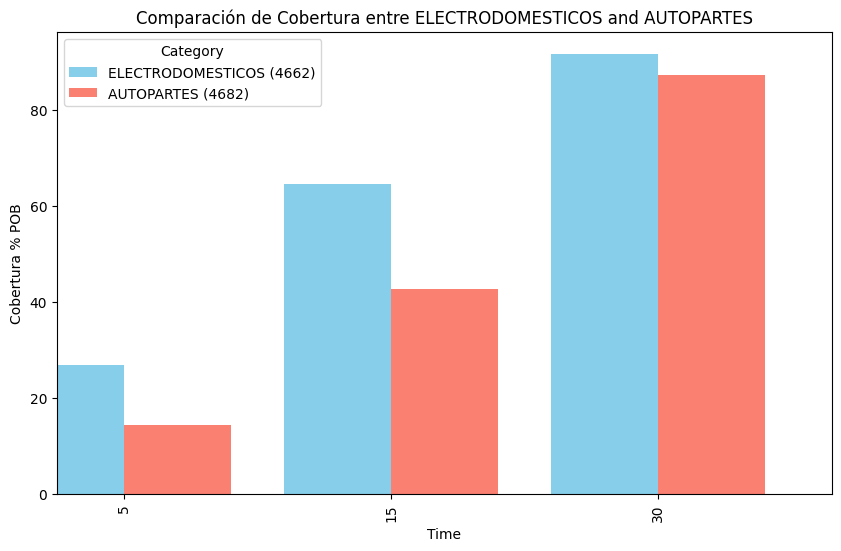

In [132]:
data = {
    'Category': ['ELECTRODOMESTICOS (4662)', 'ELECTRODOMESTICOS (4662)', 'ELECTRODOMESTICOS (4662)',
                 'AUTOPARTES (4682)', 'AUTOPARTES (4682)', 'AUTOPARTES (4682)'],
    'Time': [5, 15, 30, 5, 15, 30],
    'Value': [26.9, 64.6, 91.6, 14.39, 42.609, 87.33]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(10, 6))

df[df['Category'] == 'ELECTRODOMESTICOS (4662)'].plot(
    x='Time', y='Value', kind='bar', ax=ax, color='skyblue', label='ELECTRODOMESTICOS (4662)', position=1, width=0.4)

df[df['Category'] == 'AUTOPARTES (4682)'].plot(
    x='Time', y='Value', kind='bar', ax=ax, color='salmon', label='AUTOPARTES (4682)', position=0, width=0.4)

plt.xlabel("Time")
plt.ylabel("Cobertura % POB")
plt.title("Comparación de Cobertura entre ELECTRODOMESTICOS and AUTOPARTES")
plt.legend(title="Category")

plt.show()

In [130]:
import numpy as np

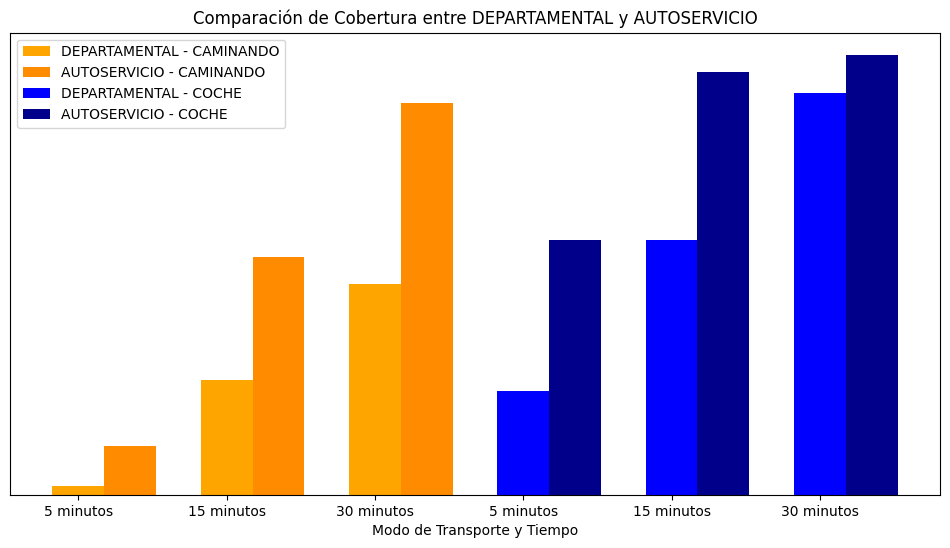

In [133]:

new_data = {
    "Modo Transporte": ["COCHE", "COCHE", "COCHE", "COCHE", "COCHE", "COCHE",
                        "CAMINANDO", "CAMINANDO", "CAMINANDO", "CAMINANDO", "CAMINANDO", "CAMINANDO"],
    "Tiempo (minutos)": [5, 5, 15, 15, 30, 30, 5, 5, 15, 15, 30, 30],
    "Actividad": ["DEPARTAMENTAL", "AUTOSERVICIO", "AUTOSERVICIO", "DEPARTAMENTAL", "DEPARTAMENTAL", "AUTOSERVICIO",
                  "DEPARTAMENTAL", "AUTOSERVICIO", "DEPARTAMENTAL", "AUTOSERVICIO", "AUTOSERVICIO", "DEPARTAMENTAL"],
    "Cobertura (%)": [23.5, 58, 96, 58, 91.26721, 100, 2, 11, 26, 54, 89, 48]
}

df_new = pd.DataFrame(new_data)

tiempos = [5, 15, 30]
departamental_caminando = df_new[(df_new["Actividad"] == "DEPARTAMENTAL") & (df_new["Modo Transporte"] == "CAMINANDO")]["Cobertura (%)"].values
autoservicio_caminando = df_new[(df_new["Actividad"] == "AUTOSERVICIO") & (df_new["Modo Transporte"] == "CAMINANDO")]["Cobertura (%)"].values
departamental_coche = df_new[(df_new["Actividad"] == "DEPARTAMENTAL") & (df_new["Modo Transporte"] == "COCHE")]["Cobertura (%)"].values
autoservicio_coche = df_new[(df_new["Actividad"] == "AUTOSERVICIO") & (df_new["Modo Transporte"] == "COCHE")]["Cobertura (%)"].values

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35

x = np.arange(len(tiempos))
ax.bar(x - width/2, departamental_caminando, width, label="DEPARTAMENTAL - CAMINANDO", color="orange")
ax.bar(x + width/2, autoservicio_caminando, width, label="AUTOSERVICIO - CAMINANDO", color="darkorange")
ax.bar(x + len(tiempos) - width/2, departamental_coche, width, label="DEPARTAMENTAL - COCHE", color="blue")
ax.bar(x + len(tiempos) + width/2, autoservicio_coche, width, label="AUTOSERVICIO - COCHE", color="darkblue")

ax.set_xticks(np.concatenate((x - width/2, x + len(tiempos) - width/2)))
ax.set_xticklabels([f"{t} minutos" for t in tiempos] * 2)
ax.set_xlabel("Modo de Transporte y Tiempo")
ax.set_title("Comparación de Cobertura entre DEPARTAMENTAL y AUTOSERVICIO")

ax.set_yticks([])
ax.legend()

# Mostrar gráfico
plt.show()



# Most Common Act per ANTAD

In [ ]:
chedraui_cdmx = CDMX[CDMX['raz_social'].str.contains('OFIX', na=False, case=False)]
chedraui_cdmx

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta


In [ ]:
CDMX[CDMX['nom_estab'].str.contains('OFIX', na=False, case=False)]

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta


In [ ]:
!pip install unidecode

In [ ]:
from unidecode import unidecode

CDMX['nom_estab'] = CDMX['nom_estab'].astype(str).apply(unidecode)
CDMX['codigo_act'] = CDMX['codigo_act'].astype(str).apply(unidecode)

DENUE['nom_estab'] = DENUE['nom_estab'].astype(str).apply(unidecode)
DENUE['codigo_act'] = DENUE['codigo_act'].astype(str).apply(unidecode)

In [ ]:
from posixpath import normcase

def count_nombre_comercial_by_codigo_act(df, denue_df):

    results = []
    for index, row in df.iterrows():
        nombre = row['Nombre Comercial'].strip().replace("´","")
        raz_social = row['Razón Social'].strip().replace(",","").replace(".","").upper()

        nombre = unidecode(nombre)
        raz_social = unidecode(raz_social)

        print(f'NOMBRE: {nombre}, RAZON: {raz_social}')

        matches = denue_df[denue_df['nom_estab'].str.contains(nombre, na=False, case=False) | denue_df['raz_social'].str.contains(raz_social, na=False, case=False)]
        if not matches.empty:
            for codigo_act in matches['codigo_act'].unique():
                count = len(matches[matches['codigo_act'] == codigo_act])
                results.append({'nombre_comercial': nombre, 'codigo_act': codigo_act, 'count': count})
        else:
          print("EMPTY")

    return pd.DataFrame(results)

result_df = count_nombre_comercial_by_codigo_act(ANTAD, DENUE)

NOMBRE: ALSUPER, RAZON: OPERADORA FUTURAMA SA DE CV
NOMBRE: CALIMAX, RAZON: CENTRAL DETALLISTA SA DE CV
NOMBRE: CASA LEY, RAZON: CASA LEY SAPI DE CV
NOMBRE: CENTRO COMERCIAL CRUZ AZUL, RAZON: CENTRO COMERCIAL CRUZ AZUL SA DE CV
NOMBRE: CHEDRAUI, RAZON: TIENDAS CHEDRAUI SA DE CV
NOMBRE: FENIX, RAZON: EL SUPER DE CASA FENIX SA DE CV
NOMBRE: HEB, RAZON: SUPERMERCADOS INTERNACIONALES HEB SA DE CV
NOMBRE: LA COMER, RAZON: LA COMER SAB DE CV
NOMBRE: LA MISION, RAZON: LA MISION SUPERMERCADOS SA DE CV
NOMBRE: MAS BODEGA Y LOGISTICA, RAZON: MAS BODEGA Y LOGISTICA SA DE CV
NOMBRE: MERZA, RAZON: ABARROTERA DEL DUERO SA DE CV
NOMBRE: PITICO, RAZON: PRODUCTOS DE CONSUMO Z SA DE CV
NOMBRE: S-MART, RAZON: OPERADORA DE CIUDAD JUAREZ SA DE CV
NOMBRE: SMART & FINAL, RAZON: SMART & FINAL DEL NOROESTE SA DE CV
NOMBRE: SORIANA, RAZON: TIENDAS SORIANA SA DE CV
NOMBRE: SU BODEGA, RAZON: ALMACENES IBARRA SA DE CV
NOMBRE: SU PLAZA, RAZON: COMPRAS PARA EL HOGAR SA DE CV
NOMBRE: SUPER DEL NORTE, RAZON: TIENDAS D

In [ ]:
result_df

,nombre_comercial,codigo_act,count
0,ALSUPER,462111,90
1,ALSUPER,461170,1
2,ALSUPER,466212,2
3,ALSUPER,464113,3
4,ALSUPER,465112,1
...,...,...,...
938,ZARA,463214,3
939,ZARA,463216,2
940,ZARA,463217,1
941,ZARA,465216,1


In [ ]:
result_df[result_df['nombre_comercial'].str.contains("COMER", na=False, case=False)]

,nombre_comercial,codigo_act,count
15,CENTRO COMERCIAL CRUZ AZUL,461110,1
16,CENTRO COMERCIAL CRUZ AZUL,462111,9
17,CENTRO COMERCIAL CRUZ AZUL,462112,1
18,CENTRO COMERCIAL CRUZ AZUL,466212,1
142,LA COMER,461110,140
143,LA COMER,462111,39
144,LA COMER,461130,5
145,LA COMER,461140,3
146,LA COMER,461212,3
147,LA COMER,461150,2


In [ ]:
def get_most_frequent_codigo_act(result_df):

    most_frequent_codes = []
    for nombre in result_df['nombre_comercial'].unique():
        subset = result_df[result_df['nombre_comercial'] == nombre]
        if not subset.empty:
            max_count = subset['count'].max()
            most_frequent_codes.extend(subset[subset['count'] == max_count].to_dict('records'))
    return pd.DataFrame(most_frequent_codes)

most_frequent_df = get_most_frequent_codigo_act(result_df)


In [ ]:
len(most_frequent_df['nombre_comercial'].unique())

86

In [ ]:
most_frequent_df.head(60)

,nombre_comercial,codigo_act,count
0,ALSUPER,462111,90
1,CALIMAX,462111,107
2,CASA LEY,462111,257
3,CENTRO COMERCIAL CRUZ AZUL,462111,9
4,CHEDRAUI,462111,329
5,FENIX,461110,243
6,HEB,462111,75
7,LA COMER,461110,140
8,LA MISION,461110,31
9,MAS BODEGA Y LOGISTICA,462112,33
